This notebook performs exploratory data analysis on the Dirty Cafe Sales dataset.
The dataset contains 10,000 sales transactions and intentionally includes missing and inconsistent values.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

**1. Load Data**

In [11]:
df = pd.read_csv("dirty_cafe_sales.csv")
#handle errors temporarily ( to visualization )
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

**2.Basic view**

In [12]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9667 non-null   object 
 2   Quantity          9521 non-null   float64
 3   Price Per Unit    9467 non-null   float64
 4   Total Spent       9498 non-null   float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


**3. Check Missing Values**

In [13]:
df.isna().sum()

Transaction ID         0
Item                 333
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

**4.Check Duplicates**

In [14]:
df.duplicated().sum()

np.int64(0)

**5.Inspect Unique Values**

In [15]:
for col in df.columns:
    print(f"\n{col}")
    print(df[col].unique()[:10])


Transaction ID
['TXN_1961373' 'TXN_4977031' 'TXN_4271903' 'TXN_7034554' 'TXN_3160411'
 'TXN_2602893' 'TXN_4433211' 'TXN_6699534' 'TXN_4717867' 'TXN_2064365']

Item
['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice']

Quantity
[ 2.  4.  5.  3.  1. nan]

Price Per Unit
[2.  3.  1.  5.  4.  1.5 nan]

Total Spent
[ 4. 12. nan 10. 20.  9. 16. 15. 25.  8.]

Payment Method
['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR' nan]

Location
['Takeaway' 'In-store' 'UNKNOWN' nan 'ERROR']

Transaction Date
['2023-09-08' '2023-05-16' '2023-07-19' '2023-04-27' '2023-06-11'
 '2023-03-31' '2023-10-06' '2023-10-28' '2023-07-28' '2023-12-31']


**6.No. of rows and columns**

In [16]:
print("Shape (rows, columns):", df.shape, "\n")

print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Shape (rows, columns): (10000, 8) 

Number of rows: 10000
Number of columns: 8


### 7.Descriptive summary Statistics

In [17]:
df.describe(include='all')

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9521.000000,9467.000000,9498.000000,7421,6735,9841
unique,10000,10,NaN,NaN,NaN,5,4,367
top,TXN_6170729,Juice,NaN,NaN,NaN,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,NaN,NaN,NaN,2291,3022,159
mean,NaN,NaN,3.028463,2.949984,8.924352,NaN,NaN,NaN
std,NaN,NaN,1.419007,1.278450,6.009919,NaN,NaN,NaN
min,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,NaN,NaN,2.000000,2.000000,4.000000,NaN,NaN,NaN
50%,NaN,NaN,3.000000,3.000000,8.000000,NaN,NaN,NaN
75%,NaN,NaN,4.000000,4.000000,12.000000,NaN,NaN,NaN


**8.visual analysis**

Univariate:

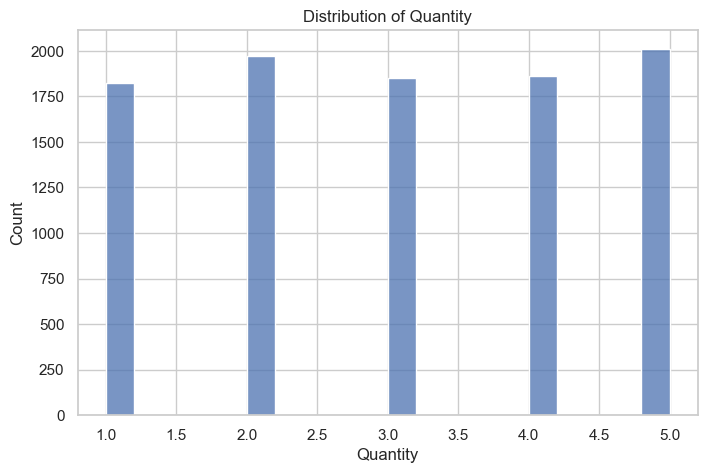

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['Quantity'], bins=20)
plt.title("Distribution of Quantity")
plt.show()

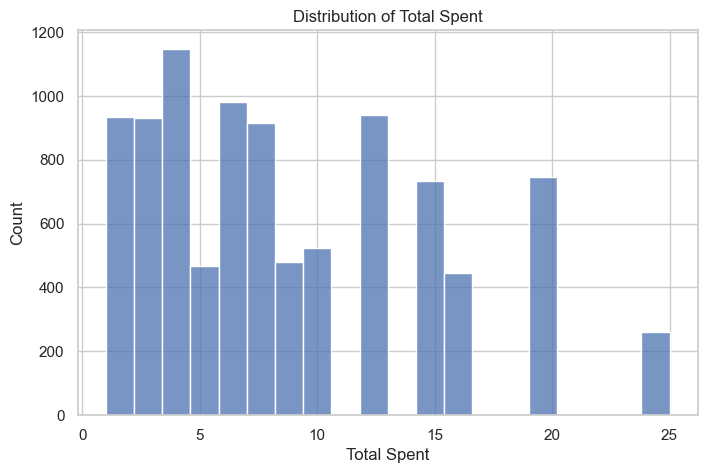

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['Total Spent'], bins=20)
plt.title("Distribution of Total Spent")
plt.show()

Bivariate:

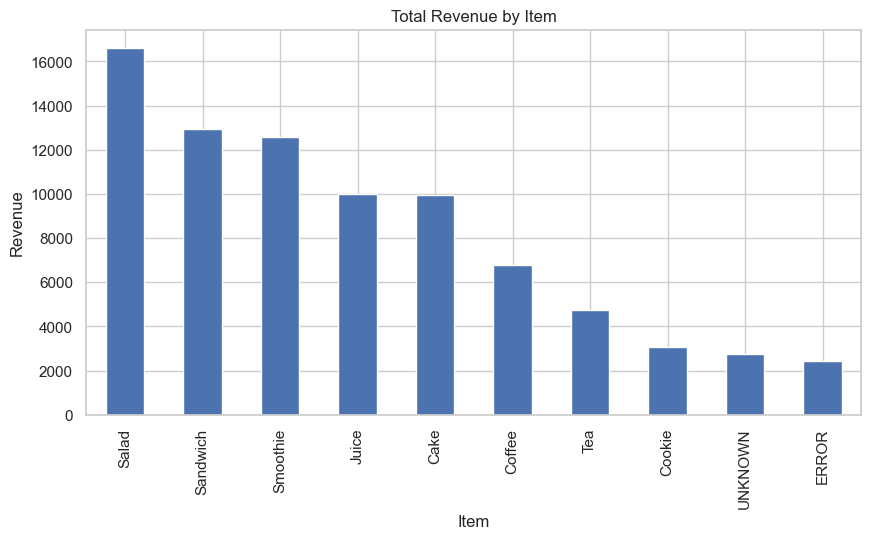

Item
Salad       16605.0
Sandwich    12956.0
Smoothie    12556.0
Juice        9984.0
Cake         9933.0
Coffee       6784.0
Tea          4735.5
Cookie       3070.0
UNKNOWN      2757.5
ERROR        2453.5
Name: Total Spent, dtype: float64

In [20]:
item_revenue = df.groupby('Item')['Total Spent'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
item_revenue.plot(kind='bar')
plt.title("Total Revenue by Item")
plt.ylabel("Revenue")
plt.show()

item_revenue

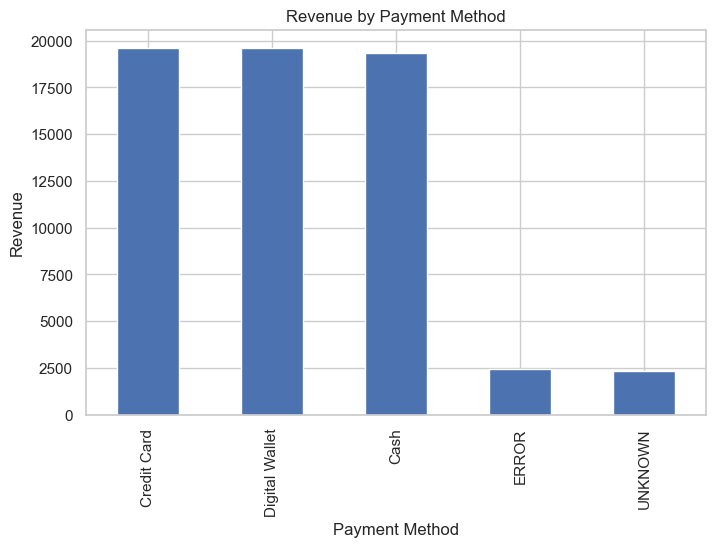

In [21]:
payment_revenue = df.groupby('Payment Method')['Total Spent'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
payment_revenue.plot(kind='bar')
plt.title("Revenue by Payment Method")
plt.ylabel("Revenue")
plt.show()


**Boxes vs Total Spent Relationship**

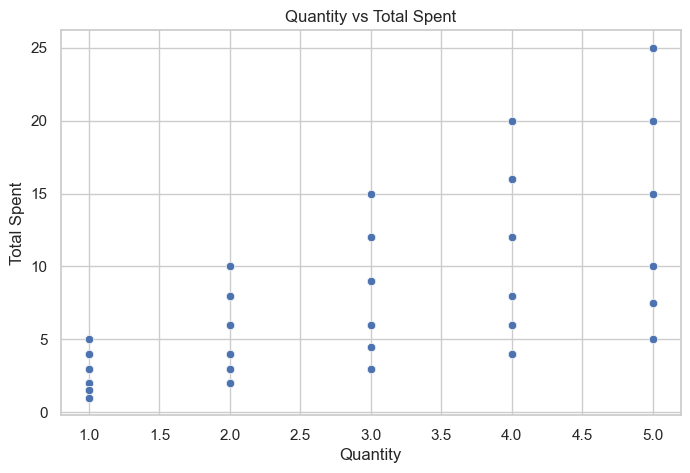

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Quantity', y='Total Spent', data=df)
plt.title("Quantity vs Total Spent")
plt.show()

**Correlation Matrix**

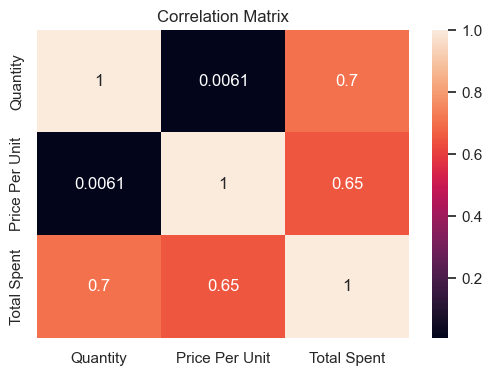

In [23]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Quantity','Price Per Unit','Total Spent']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

Time Analysis:

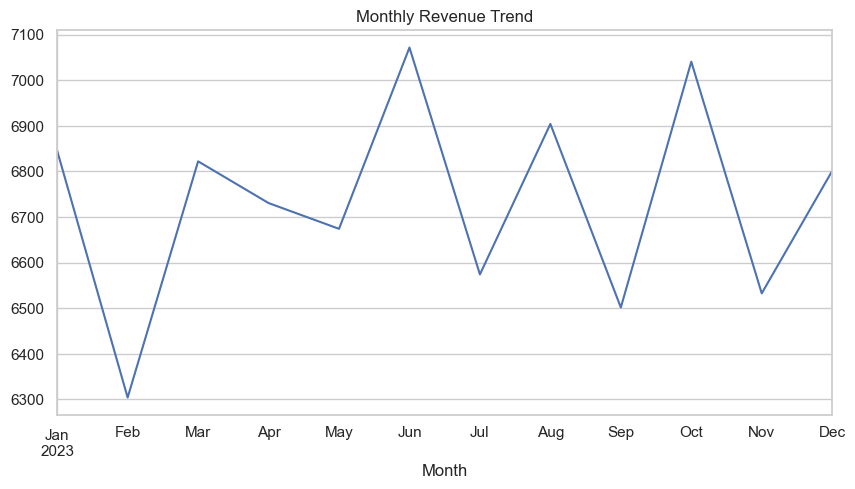

In [27]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df['Month'] = df['Transaction Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Total Spent'].sum()

monthly_sales.plot(figsize=(10,5))
plt.title("Monthly Revenue Trend")
plt.show()